In [1]:
"""
Coursera Final Project
Data Sources:
CBP Nationwide Encounters: https://www.cbp.gov/document/stats/nationwide-encounters
Notes: OFO (CBP field offices located at port of entries), USBP (patrols the border and apprehends
those who don't cross at a port of entry. Title 8 data from these two agencies combined)
- Drop rows with remaining months

EOIR FOIA Data: https://www.justice.gov/eoir/foia-library-0

Research question: Does a spike in border encounters correspond to a spike in cases docketed at
the immigration court?

Cleaning the CBP Data:
Index(['Fiscal Year', 'Month Grouping', 'Month (abbv)', 'Component',
       'Land Border Region', 'Area of Responsibility', 'AOR (Abbv)', 'State',
       'Demographic', 'Citizenship', 'Title of Authority', 'Encounter Type',
       'Encounter Count'],

1. Drop all rows containing title 42
2. Group rows by month and year
3. Aggregate all apprehensions and inadmissibility encounters for given month and year
"""

"\nCoursera Final Project\nData Sources:\nCBP Nationwide Encounters: https://www.cbp.gov/document/stats/nationwide-encounters\nNotes: OFO (CBP field offices located at port of entries), USBP (patrols the border and apprehends\nthose who don't cross at a port of entry. Title 8 data from these two agencies combined)\n- Drop rows with remaining months\n\nEOIR FOIA Data: https://www.justice.gov/eoir/foia-library-0\n\nResearch question: Does a spike in border encounters correspond to a spike in cases docketed at\nthe immigration court?\n\nCleaning the CBP Data:\nIndex(['Fiscal Year', 'Month Grouping', 'Month (abbv)', 'Component',\n       'Land Border Region', 'Area of Responsibility', 'AOR (Abbv)', 'State',\n       'Demographic', 'Citizenship', 'Title of Authority', 'Encounter Type',\n       'Encounter Count'],\n\n1. Drop all rows containing title 42\n2. Group rows by month and year\n3. Aggregate all apprehensions and inadmissibility encounters for given month and year\n"

In [2]:
"""CBP Import from CSV"""
import pandas as pd
enc = pd.read_csv('./Data/nationwide-encounters-fy19-fy22-aug.csv', sep=',')



In [3]:
"""CBP Discard unnecessary columns and remove encounters under Title 42"""
#enc = enc[enc['Title of Authority'] == 'Title 8']

enc = enc.drop(['Component', 'Month Grouping', 'Land Border Region', 'Area of Responsibility', \
          'AOR (Abbv)', 'State', 'Citizenship', \
          'Encounter Type', 'Demographic'], axis=1)

In [4]:
"""CBP Change year data from fiscal to calendar year"""
def fiscal_to_calendar(s):
    special_months = ['OCT', 'NOV', 'DEC']

    year = ''.join([ch for ch in s['Fiscal Year'] if ch.isnumeric()])
    if (s['Month (abbv)'] in special_months):
        return str(int(year)-1)
    else:
        return str(int(year))

enc['Calendar Year'] = enc.apply(fiscal_to_calendar, axis=1)

In [5]:
"""CBP Convert to Datetime, drop all columns but data and encounters, sum encounters for each month and sort"""
enc['Date'] = pd.to_datetime(enc['Month (abbv)'] + ', ' + enc['Calendar Year'], format='%b, %Y')
enc = enc.drop(['Fiscal Year', 'Month (abbv)', 'Calendar Year'], axis=1)
cbp8 = enc[enc['Title of Authority'] == 'Title 8']\
          .groupby('Date')\
          .sum()\
          .reset_index()\
          .sort_values(by='Date')
cbp42 = enc[enc['Title of Authority'] == 'Title 42']\
          .groupby('Date')\
          .sum()\
          .reset_index()\
          .sort_values(by='Date')

In [6]:
cbp8


,Date,Encounter Count
0,2019-10-01,61159.0
1,2019-11-01,57524.0
2,2019-12-01,56186.0
3,2020-01-01,52254.0
4,2020-02-01,54884.0
5,2020-03-01,44699.0
6,2020-04-01,14199.0
7,2020-05-01,18918.0
8,2020-06-01,20129.0
9,2020-07-01,16534.0


In [7]:
eoir = pd.read_csv('./Data/fy_20_22.csv', sep='|')
eoir['new_cases'] = eoir['0']
eoir['Date'] = pd.to_datetime(eoir['input_date'], format='%Y-%m')
eoir = eoir.drop(['Unnamed: 0', '0','input_date'], axis=1)
eoir


,new_cases,Date
0,79571,2019-10-01
1,58958,2019-11-01
2,53145,2019-12-01
3,52187,2020-01-01
4,46361,2020-02-01
5,38535,2020-03-01
6,27932,2020-04-01
7,25041,2020-05-01
8,22840,2020-06-01
9,18518,2020-07-01


In [8]:
to_plot = pd.merge(eoir, cbp8, on='Date').set_index('Date')

dates = to_plot.index
enc = to_plot['Encounter Count'].astype(int)
new_cases = to_plot['new_cases']
#to_plot.dtypes
#to_plot.index
#new_cases.dtype

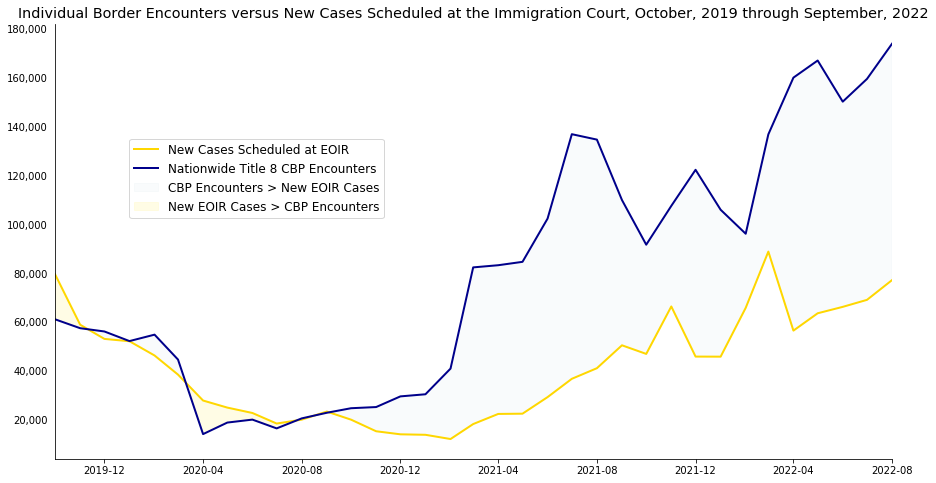

In [14]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Plot Setup
fig = plt.figure(figsize=(15,8))
plt.margins(x=0)
plt.title("""Individual Border Encounters versus New Cases Scheduled at the Immigration Court, October, 2019 through September, 2022""",\
         fontsize='x-large')

# Plot CBP and EOIR Data Line Graphs
plt.plot(dates, new_cases, color='gold', \
        label='New Cases Scheduled at EOIR', linewidth=2)
plt.plot(dates, enc, color='darkblue', \
        label='Nationwide Title 8 CBP Encounters', linewidth=2)

# Remove Junk, Format Axes
ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.tick_params(top='off', bottom='on', left='off', right='off')

for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)

# Shade Between Lines
ax.fill_between(
                dates, enc, new_cases, \
                where=(enc > new_cases),\
                interpolate=True, color='steelblue', alpha=0.03,
                label='CBP Encounters > New EOIR Cases'
        )
ax.fill_between(
                dates, enc, new_cases, \
                where=(enc < new_cases),\
                interpolate=True, color='lemonchiffon', alpha=.5,
                label='New EOIR Cases > CBP Encounters'
        )

# Create Legend
plt.legend(bbox_to_anchor=(.4,.75), fontsize='large')



plt.show()


/opt/conda/lib/python3.6/site-packages/matplotlib/figure.py:402: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


NotImplementedError: 

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

fig = plt.figure(figsize=(15,8))
plt.margins(x=0)
plt.title("""Individual Border Encounters versus New Cases Scheduled at the Immigration Court, October 2019 through September, 2022""")
plt.plot(eoir['Date'], eoir['new_cases'], color='gold', \
        label='New Cases Scheduled at EOIR')
plt.plot(cbp8['Date'], cbp8['Encounter Count'], color='darkblue', \
        label='Nationwide Title 8 CBP Encounters')
#plt.plot(cbp42['Date'], cbp42['Encounter Count'], color='lightsteelblue', \
#        label='Nationwide Title 42 CBP Encounters')

ax = plt.gca()
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
plt.legend(bbox_to_anchor=(.4,.75))
#ax.fill_between(
#                cbp8['Date'], cbp8['Encounter Count'],eoir['new_cases'], \
#                where=(cbp8['Encounter Count'] > eoir['new_cases']),\
#                interpolate=True, color='gainsboro', alpha=0.25,
#                label='None'
#        )
#plt.fill_between(cbp8['Date'], cbp8['Encounter Count'], \
#                 eoir['new_cases'], color='gainsboro')
plt.tick_params(top='off', bottom='on', left='off', right='off')
for spine in ['right', 'top']:
    ax.spines[spine].set_visible(False)
    

plt.show()

In [ ]:
#Interactivity
diff = plt.text('2020-03-01',160000, 'Click on Two Points to See the Difference Between Them',\
                fontsize='x-large')

In [ ]:
"""
Learning Outakes
"""
#enc[(enc['Demographic']=='Single Adults') & (enc['Citizenship']=='CANADA') & (enc['State'] == 'ME') & (enc['AOR (Abbv)'] == 'Boston')]
#enc.columns
#enc[enc['Fiscal Year'] == '2019']
#enc
#apr_20 = enc[(enc['Fiscal Year'] == '2020') & (enc['Month (abbv)'] == 'APR')]
#apr_20[apr_20['Month Grouping'] == 'FYTD']
#apr_20[apr_20['Month Grouping'] == 'Remaining']
#enc.drop(['Component', 'Land Border Region', 'Area of Responsibility', 'AOR (Abbv)', 'State', 'Demographic', 'Citizenship'], axis=0)
#enc['Month Grouping'].unique()
#enc[enc['Month Grouping'] == 'Remaining']
#enc[(enc['Fiscal Year'] == '2022 (FYTD)') & (enc['Month (abbv)'] == 'APR')]
#enc[enc['Fiscal Year'] == '2021']
#rem = enc[enc['Month Grouping'] == 'Remaining']
#rem[rem['Month (abbv)'] == 'SEP']
#enc[(enc['Month (abbv)']=='SEP') & (enc['Fiscal Year']=='2022 (FYTD)')]
#enc['']
#enc['Encounter Count'].sum()
#enc[(enc['Month (abbv)']=='SEP') & (enc['Fiscal Year']==2021) \
#& (enc['AOR (Abbv)']=='Boston') & (enc['State']=='ME')]
#enc[(enc['Month Grouping']=='FYTD') & (enc['Month (abbv)']=='SEP')]